In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import math as m

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 21
mpl.rcParams['axes.titlesize'] = 21
mpl.rcParams['xtick.labelsize'] = 21
mpl.rcParams['ytick.labelsize'] = 21

# подключаем пакеты для рендеринга русского текста в LaTeX
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
mpl.rc('text.latex', preamble=r"\usepackage[russian]{babel}")

/home/artfin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
NL = 2.6867805E+25
hbar = 1.0545718E-34
boltzconst = 1.38064852E-23
lightspeed = 2.99792458e10
CONSTANT = (2*np.pi)**3 * NL**2 / 3.0 / hbar
TEMPERATURE = 295

def desymmeterize( spectrum ):
    d3 = []
    for omega, value in zip(spectrum[:,0], spectrum[:,1]):
        HW_KT = hbar * lightspeed * 2.0 * np.pi * omega / (boltzconst * TEMPERATURE)
        d3.append( value * np.exp(HW_KT / 2.0) )
    return np.vstack( (spectrum[:,0], d3) ).T

In [3]:
specfunc = np.loadtxt("/home/artfin/Desktop/repos/he_ar/cvode_he_ar_spherical_merge/results/spfun3_planar.txt")
specfunc_d3 = desymmeterize( specfunc )

specfunc_symm_freqs = np.concatenate((specfunc[:,0][::-1] * (-1.0), specfunc[:,0]))
specfunc_symm_vals = np.concatenate((specfunc[:,1][::-1], specfunc[:,1]))
specfunc_symm = np.vstack((specfunc_symm_freqs, specfunc_symm_vals)).T
specfunc_symm_d3 = desymmeterize( specfunc_symm )

<IPython.core.display.Javascript object>


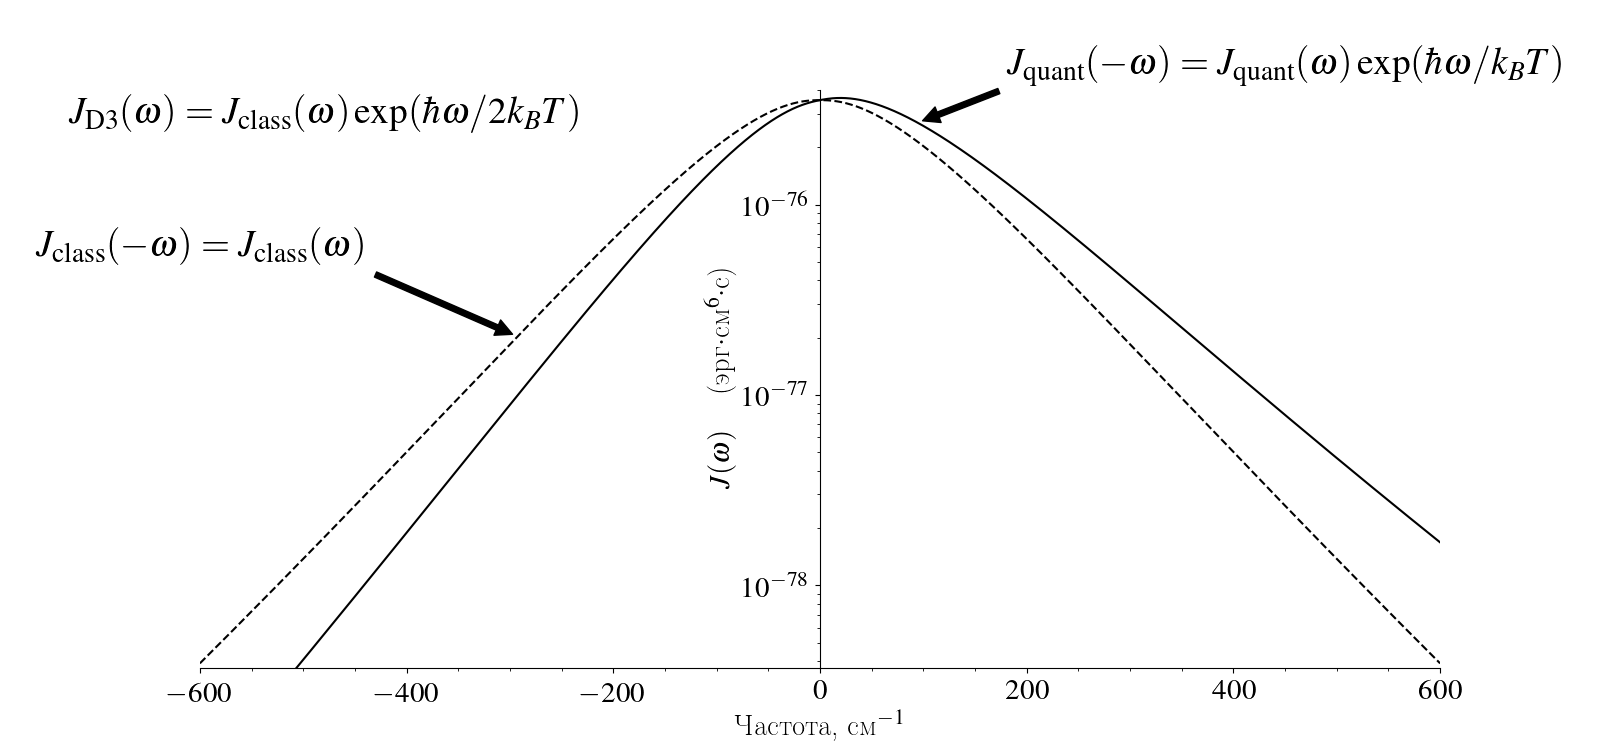

In [9]:
fig = plt.figure(figsize = (16, 7.5))
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(plt.MultipleLocator(50.0))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
#ax.text( 0.92, 0.92, '295 K', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 28, 
#        transform = ax.transAxes )

plt.semilogy( specfunc_symm[:,0], specfunc_symm[:,1], color = 'k', linestyle = 'dashed' )
plt.semilogy( specfunc_symm_d3[:,0], specfunc_symm_d3[:,1], color = 'k' )

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('center')

ax.text(0.1, 0.95, "$J_{\mathrm{D3}}(\omega) = J_{\mathrm{class}}(\omega) \exp ( \hbar \omega / 2 k_B T )$",
       horizontalalignment = 'center', verticalalignment = 'center', fontsize = 27, transform = ax.transAxes )

ax.annotate('$J_{\mathrm{class}}(-\omega) = J_{\mathrm{class}}(\omega)$', xy=(-290, 2.0e-77), xytext=(-760, 5.0e-77),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 27)

ax.annotate('$J_{\mathrm{quant}}(-\omega) = J_{\mathrm{quant}}(\omega) \exp (\hbar \omega / k_B T)$', xy = (95, 2.7e-76),
           xytext = (180, 4.5e-76), arrowprops=dict(facecolor='black', shrink=0.05), size = 27)

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xlabel(u'Частота, см$^{-1}$')
plt.ylabel(u'$J(\\omega) \quad$ (эрг$\cdot$см$^6 \cdot$с)')

plt.xlim((-600.0, 600.0))
plt.ylim((3.7e-79, 4.0e-76))
plt.show()

#plt.savefig("/home/artfin/Desktop/spectral_function_symmetry.eps", format = 'eps', dpi = 1000)
#plt.savefig("./spectral_function_symmetry.eps", format = 'eps', dpi = 1000)